<a href="https://colab.research.google.com/github/Devsharma003/Dev/blob/main/decission_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [ ]:
company=pd.read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


Checking for null values

In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


# There are no null values in the data

# Checking for duplicate values

In [ ]:
company[company.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


# There are no duplicate values in the data

# Distribution in the numerical features in the data

<AxesSubplot:xlabel='Sales', ylabel='Density'>

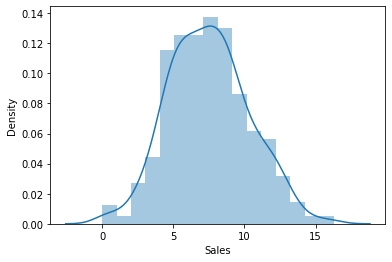

In [ ]:
sns.distplot(company.Sales)

<AxesSubplot:xlabel='Income', ylabel='Density'>

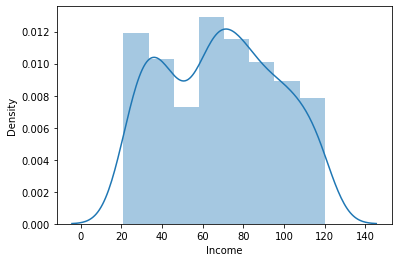

In [ ]:
sns.distplot(company.Income)

<AxesSubplot:xlabel='Advertising', ylabel='Density'>

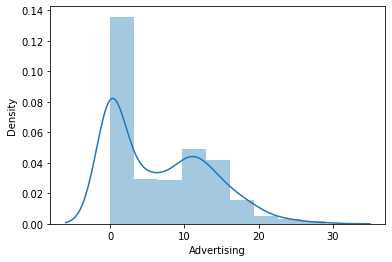

In [ ]:
sns.distplot(company.Advertising)

<AxesSubplot:xlabel='Population', ylabel='Density'>

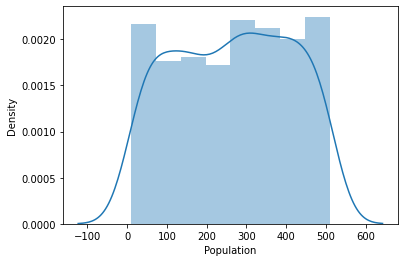

In [ ]:
sns.distplot(company.Population)

<AxesSubplot:xlabel='Price', ylabel='Density'>

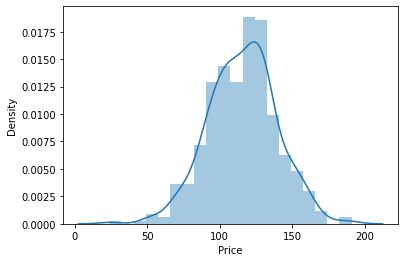

In [ ]:
sns.distplot(company.Price)

<AxesSubplot:xlabel='Age', ylabel='Density'>

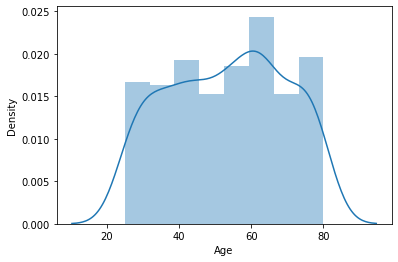

In [ ]:
sns.distplot(company.Age)

<AxesSubplot:xlabel='Education', ylabel='Density'>

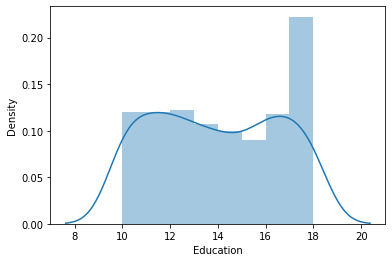

In [ ]:
sns.distplot(company.Education)

# Boxplot in the numerical features in the data

Text(0.5, 1.0, 'Education')

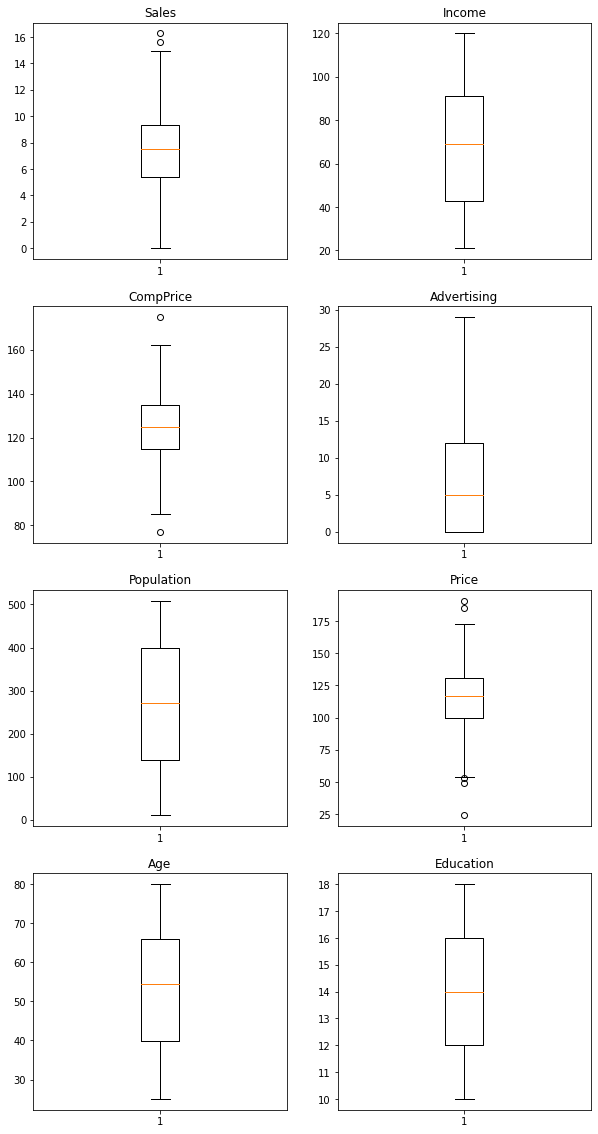

In [ ]:
fig,axs=plt.subplots(4,2,figsize=(10,20))
axs[0,0].boxplot(company.Sales)
axs[0,1].boxplot(company.Income)
axs[1,0].boxplot(company.CompPrice)
axs[1,1].boxplot(company.Advertising)
axs[2,0].boxplot(company.Population)
axs[2,1].boxplot(company.Price)
axs[3,0].boxplot(company.Age)
axs[3,1].boxplot(company.Education)
axs[0,0].set_title("Sales")
axs[0,1].set_title("Income")
axs[1,0].set_title("CompPrice")
axs[1,1].set_title("Advertising")
axs[2,0].set_title("Population")
axs[2,1].set_title("Price")
axs[3,0].set_title("Age")
axs[3,1].set_title("Education")

In [ ]:
company.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [ ]:
company.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [ ]:
company.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

# Using label encoder for categorical data

Shelveloc

Bad=0

good=1

medium=2

Urban

No=0

Yes=1

US

No=0

Yes=1





In [ ]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc'])
company['Urban']= label_encoder.fit_transform(company['Urban'])
company['US']= label_encoder.fit_transform(company['US'])

In [ ]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


# Splitting dependent and independent variables

In [ ]:
d=company.iloc[:,1]
x=company.iloc[:,1:]

In [ ]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [ ]:
d

0      138
1      111
2      113
3      117
4      141
      ... 
395    138
396    139
397    162
398    100
399    134
Name: CompPrice, Length: 400, dtype: int64

# Binning the sales data in the 4 bins

In [ ]:
y=d.copy()

In [ ]:
m=pd.cut(y,bins=4)

In [ ]:
m.value_counts()

(101.5, 126.0]     189
(126.0, 150.5]     167
(76.902, 101.5]     26
(150.5, 175.0]      18
Name: CompPrice, dtype: int64

In [ ]:
y

0      138
1      111
2      113
3      117
4      141
      ... 
395    138
396    139
397    162
398    100
399    134
Name: CompPrice, Length: 400, dtype: int64

In [ ]:
y=m

# Label encoding for the sales column

In [ ]:
y

0       (126.0, 150.5]
1       (101.5, 126.0]
2       (101.5, 126.0]
3       (101.5, 126.0]
4       (126.0, 150.5]
            ...       
395     (126.0, 150.5]
396     (126.0, 150.5]
397     (150.5, 175.0]
398    (76.902, 101.5]
399     (126.0, 150.5]
Name: CompPrice, Length: 400, dtype: category
Categories (4, interval[float64, right]): [(76.902, 101.5] < (101.5, 126.0] < (126.0, 150.5] <
                                           (150.5, 175.0]]

In [ ]:
le=preprocessing.LabelEncoder()

In [ ]:
y=le.fit_transform(y)

In [ ]:
y

array([2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 3, 0, 1,
       0, 2, 2, 1, 1, 3, 0, 1, 3, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1,
       2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 2, 2,
       1, 2, 1, 0, 1, 2, 1, 2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 3, 1, 2, 2, 0, 1,
       1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       2, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 2, 3, 1, 3, 1, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 3, 1, 1, 3, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2,
       1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1,

# Splitting in to train and test data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

# Building model (criteria used in entropy)

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Plotting the decision tree

[Text(0.5, 0.8333333333333334, 'x[0] <= 126.5\nentropy = 1.501\nsamples = 320\nvalue = [23, 142, 142, 13]'),
 Text(0.25, 0.5, 'x[0] <= 101.0\nentropy = 0.583\nsamples = 165\nvalue = [23, 142, 0, 0]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 23\nvalue = [23, 0, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 142\nvalue = [0, 142, 0, 0]'),
 Text(0.75, 0.5, 'x[0] <= 150.5\nentropy = 0.416\nsamples = 155\nvalue = [0, 0, 142, 13]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 142\nvalue = [0, 0, 142, 0]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 0, 13]')]

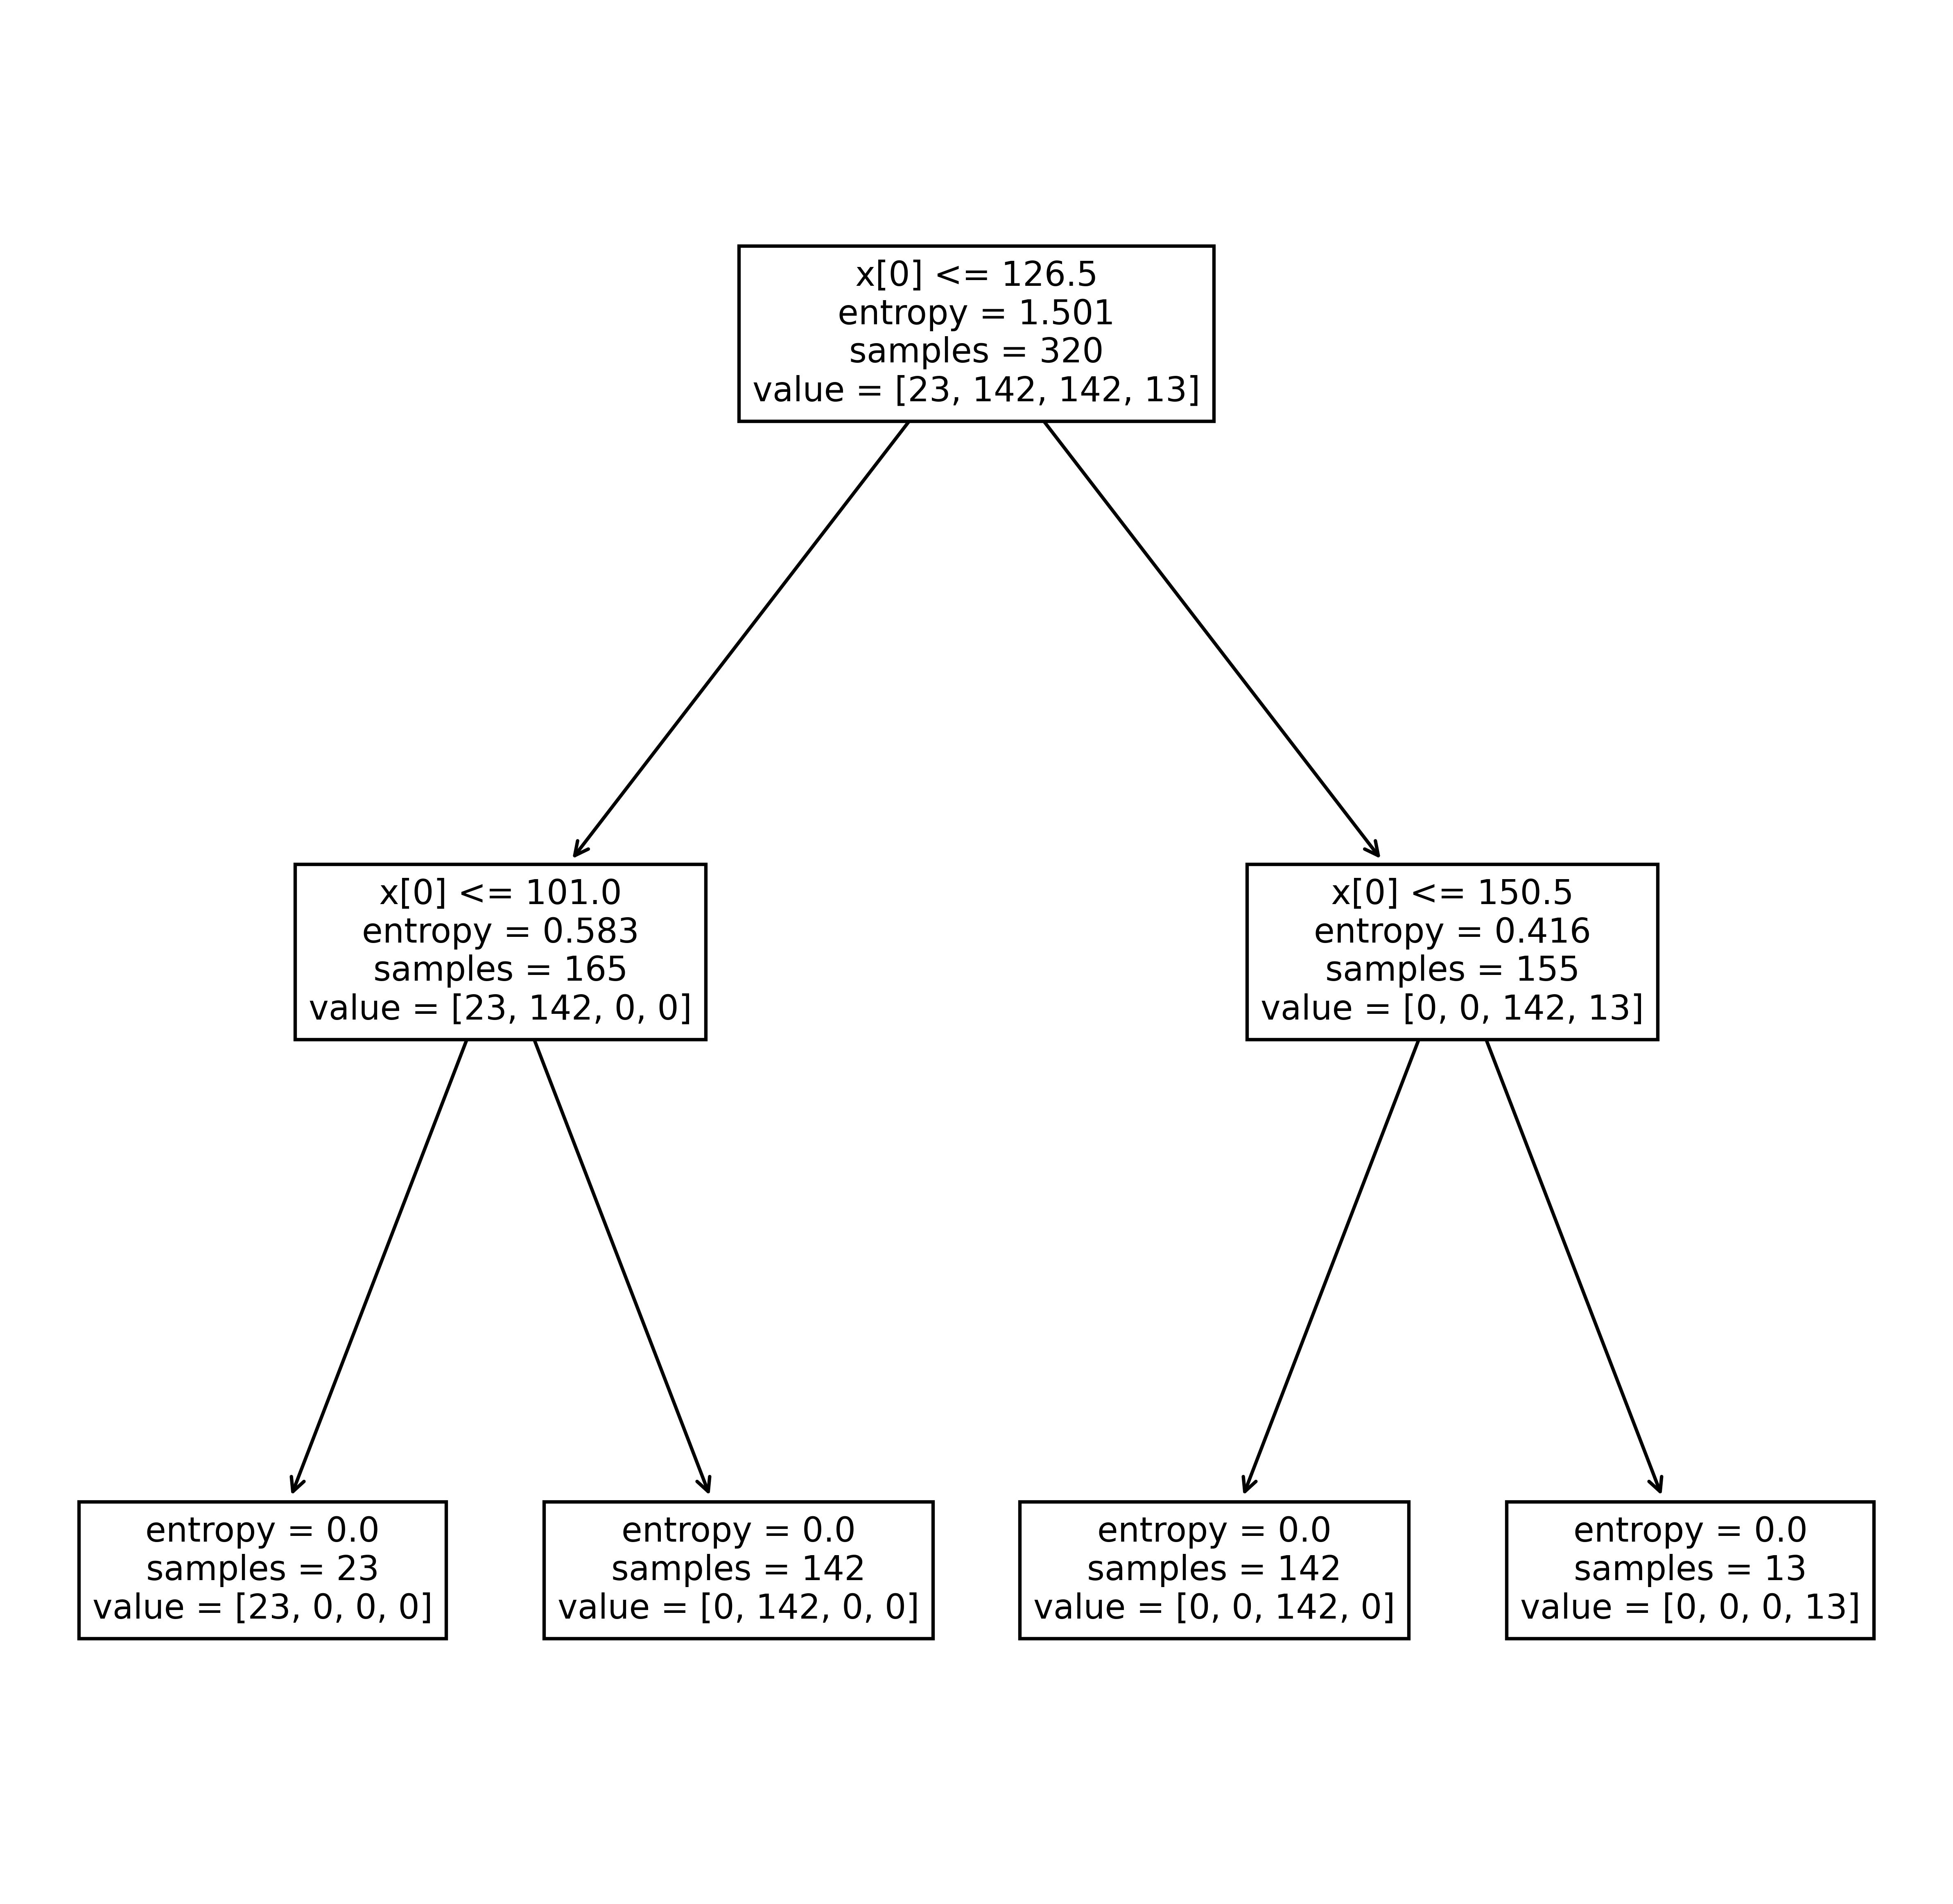

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=600)
tree.plot_tree(model)

# The classification is only dependent upon the competitor price

In [ ]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [ ]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1    47
2    25
3     5
0     3
dtype: int64

In [ ]:
pd.crosstab(y_test,preds)

col_0,0,1,2,3
row_0,,,,
0,3,0,0,0
1,0,47,0,0
2,0,0,25,0
3,0,0,0,5


# The classification has a very high accuracy


# trying to bin the sales column into 6 bins

In [ ]:
y=d.copy()

[Text(0.5, 0.875, 'x[0] <= 126.5\nentropy = 2.003\nsamples = 320\nvalue = [8, 38, 119, 113, 38, 4]'),
 Text(0.3, 0.625, 'x[0] <= 109.5\nentropy = 1.04\nsamples = 165\nvalue = [8, 38, 119, 0, 0, 0]'),
 Text(0.2, 0.375, 'x[0] <= 93.5\nentropy = 0.667\nsamples = 46\nvalue = [8, 38, 0, 0, 0, 0]'),
 Text(0.1, 0.125, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0, 0, 0, 0, 0]'),
 Text(0.3, 0.125, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38, 0, 0, 0, 0]'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 119\nvalue = [0, 0, 119, 0, 0, 0]'),
 Text(0.7, 0.625, 'x[0] <= 142.5\nentropy = 0.966\nsamples = 155\nvalue = [0, 0, 0, 113, 38, 4]'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 113\nvalue = [0, 0, 0, 113, 0, 0]'),
 Text(0.8, 0.375, 'x[0] <= 158.0\nentropy = 0.454\nsamples = 42\nvalue = [0, 0, 0, 0, 38, 4]'),
 Text(0.7, 0.125, 'entropy = 0.0\nsamples = 38\nvalue = [0, 0, 0, 0, 38, 0]'),
 Text(0.9, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 0, 0, 0, 4]')]

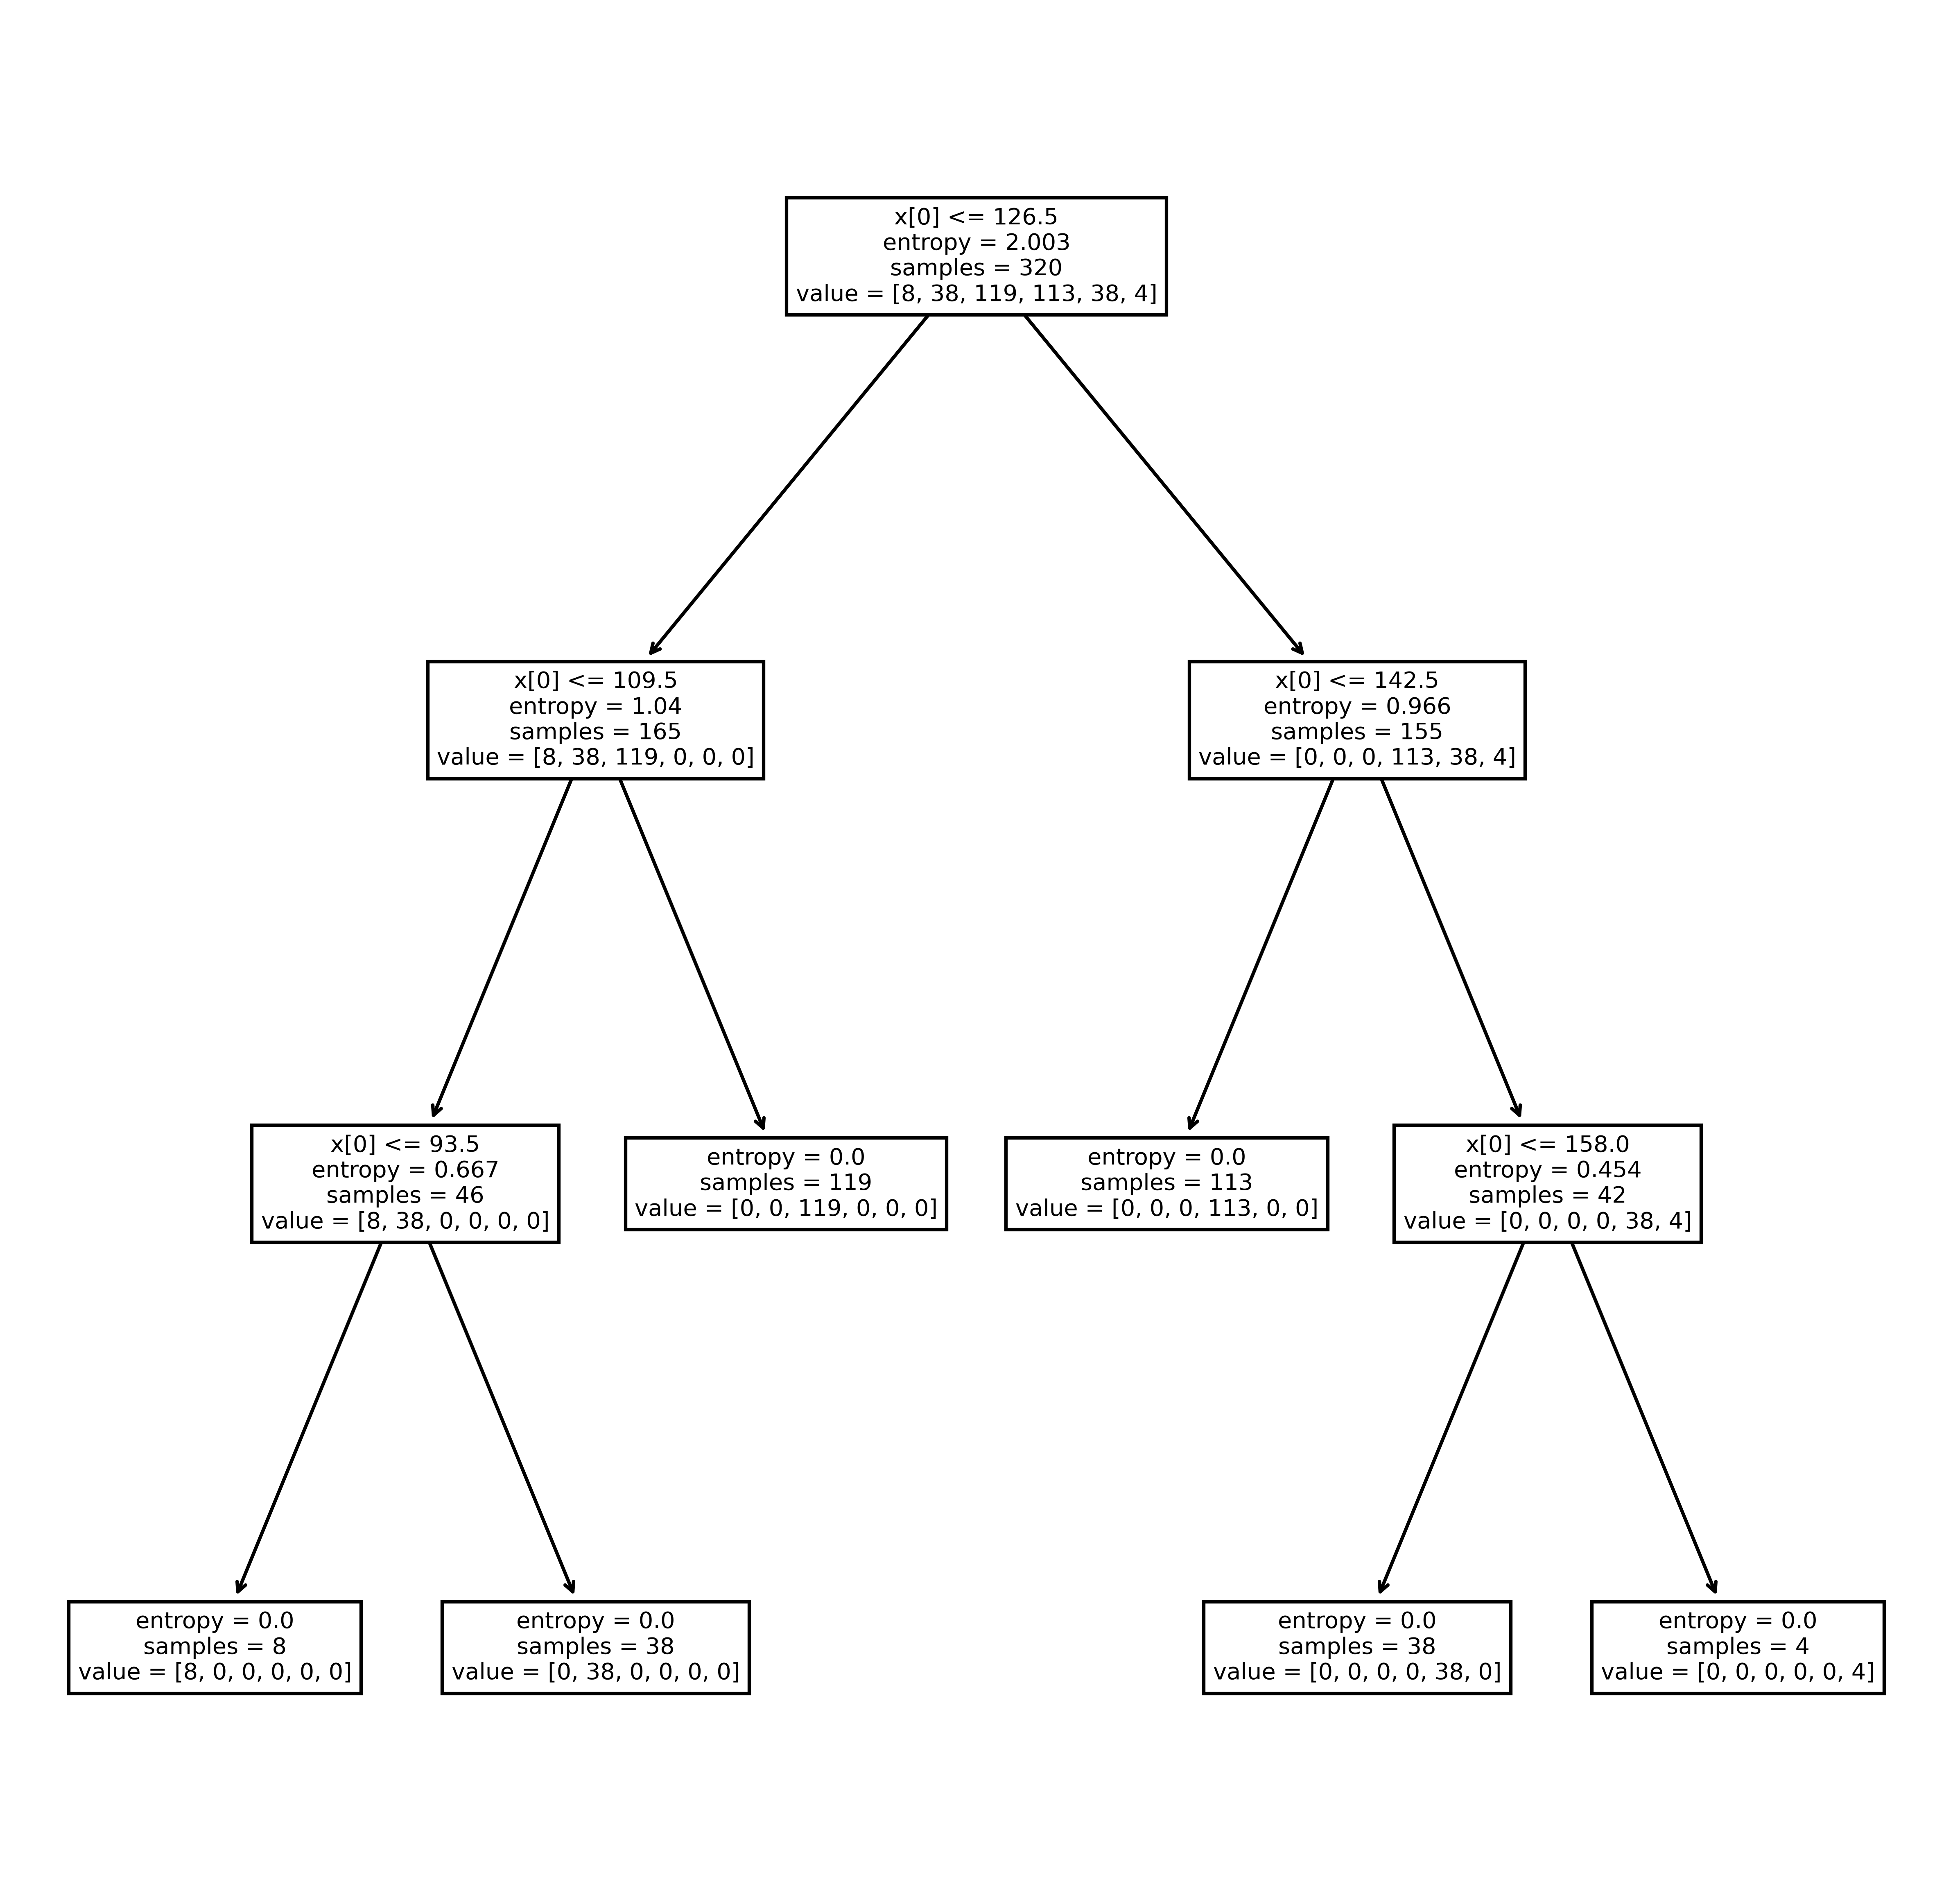

In [ ]:
m=pd.cut(y,bins=6)
y=m
le=preprocessing.LabelEncoder()
y=le.fit_transform(y)
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=600)
tree.plot_tree(model)

In [ ]:
y

array([3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 1, 4, 2, 4, 2, 3, 2, 3,
       3, 2, 4, 3, 1, 1, 1, 1, 2, 3, 1, 2, 2, 3, 2, 2, 1, 3, 2, 4, 0, 2,
       0, 3, 3, 2, 2, 4, 1, 2, 4, 1, 3, 4, 3, 0, 1, 2, 2, 1, 3, 2, 1, 2,
       3, 2, 4, 3, 0, 4, 2, 2, 4, 0, 1, 2, 3, 3, 2, 2, 4, 1, 2, 2, 4, 3,
       2, 3, 2, 1, 2, 4, 2, 3, 4, 5, 2, 2, 2, 3, 2, 2, 2, 1, 1, 3, 1, 2,
       3, 3, 2, 3, 2, 3, 3, 4, 2, 3, 3, 2, 2, 3, 3, 0, 4, 2, 3, 4, 1, 1,
       2, 3, 3, 1, 3, 3, 2, 4, 3, 3, 2, 2, 3, 4, 2, 3, 2, 2, 2, 2, 3, 4,
       3, 1, 4, 2, 3, 2, 2, 4, 2, 3, 4, 4, 2, 1, 3, 1, 3, 0, 1, 3, 3, 2,
       3, 3, 1, 4, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 4, 1, 3, 2, 2, 3, 2,
       2, 2, 4, 3, 2, 3, 4, 2, 5, 2, 0, 1, 2, 2, 4, 4, 2, 2, 3, 1, 3, 2,
       3, 2, 3, 2, 3, 1, 2, 2, 4, 1, 2, 3, 3, 2, 2, 2, 3, 4, 2, 2, 5, 3,
       2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 1, 2, 4, 2, 1, 2, 3, 2, 2, 2,
       3, 3, 3, 3, 2, 5, 2, 2, 2, 2, 3, 1, 3, 3, 2, 3, 2, 2, 4, 3, 1, 4,
       2, 1, 2, 4, 1, 2, 2, 2, 4, 2, 3, 2, 4, 3, 2,

# splitting into 6 bins the classification is only depended upon competitor price

In [ ]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

2    33
3    22
1    16
4     6
5     2
0     1
dtype: int64

In [ ]:
pd.crosstab(y_test,preds)

col_0,0,1,2,3,4,5
row_0,,,,,,
0,1,0,0,0,0,0
1,0,16,0,0,0,0
2,0,0,33,0,0,0
3,0,0,0,22,0,0
4,0,0,0,0,6,0
5,0,0,0,0,0,2


In [ ]:
np.mean(preds==y_test)

1.0

# The model has the very high accuracy of 1